In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/project_dump/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [3]:
#to supress the output, similar to the code above
#!unzip gdrive/My\ Drive/data/train.zip > /dev/null

In [4]:
#all the library that needs to be downloaded
!pip install tensorflow
!pip install efficientnet_base_model

ERROR: Could not find a version that satisfies the requirement efficientnet_base_model (from versions: none)
ERROR: No matching distribution found for efficientnet_base_model


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

OVERALL SETTINGS

In [6]:
# Define hyperparameters
FINE_TUNING_EPOCHS = 7  # Number of epochs for fine-tuning
TRAINING_EPOCHS = 3     # Number of epochs for initial training
BATCH_SIZE = 512       # Batch size for training
image_height = 256     # Height of input images
image_width = 256      # Width of input images

DATASET

In [7]:
train_df = pd.read_csv("/content/train.csv")
valid_df = pd.read_csv("/content/valid.csv")
test_df  = pd.read_csv("/content/test.csv")

In [8]:
train_df

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,31355,1,real,train/real/31355.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,02884,1,real,train/real/02884.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,33988,1,real,train/real/33988.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,53875,1,real,train/real/53875.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,24149,1,real,train/real/24149.jpg
...,...,...,...,...,...,...
99995,49995,/kaggle/input/1-million-fake-faces/1m_faces_04...,H1JLRZ3J8U,0,fake,train/fake/H1JLRZ3J8U.jpg
99996,49996,/kaggle/input/1-million-fake-faces/1m_faces_00...,NRHSNJCH6X,0,fake,train/fake/NRHSNJCH6X.jpg
99997,49997,/kaggle/input/1-million-fake-faces/1m_faces_00...,2KN0ZS1R7V,0,fake,train/fake/2KN0ZS1R7V.jpg
99998,49998,/kaggle/input/1-million-fake-faces/1m_faces_04...,Y6UL82SD8A,0,fake,train/fake/Y6UL82SD8A.jpg


In [9]:
valid_df

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,20001,1,real,valid/real/20001.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,11264,1,real,valid/real/11264.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,19817,1,real,valid/real/19817.jpg
3,3,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,46851,1,real,valid/real/46851.jpg
4,4,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,10411,1,real,valid/real/10411.jpg
...,...,...,...,...,...,...
19995,9995,/kaggle/input/1-million-fake-faces/1m_faces_00...,HEK1JMB42D,0,fake,valid/fake/HEK1JMB42D.jpg
19996,9996,/kaggle/input/1-million-fake-faces/1m_faces_04...,YRK2K51TET,0,fake,valid/fake/YRK2K51TET.jpg
19997,9997,/kaggle/input/1-million-fake-faces/1m_faces_12...,5KB4VZJE9Z,0,fake,valid/fake/5KB4VZJE9Z.jpg
19998,9998,/kaggle/input/1-million-fake-faces/1m_faces_00...,PL40A1KEVB,0,fake,valid/fake/PL40A1KEVB.jpg


In [10]:
test_df = test_df.sample(frac=1)

In [11]:
test_df

,Unnamed: 0,original_path,id,label,label_str,path
8576,8576,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,05875,1,real,test/real/05875.jpg
18897,8897,/kaggle/input/1-million-fake-faces/1m_faces_12...,BZNI1K2YKB,0,fake,test/fake/BZNI1K2YKB.jpg
5026,5026,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,34563,1,real,test/real/34563.jpg
6545,6545,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,51837,1,real,test/real/51837.jpg
13450,3450,/kaggle/input/1-million-fake-faces/1m_faces_08...,TY6IZXRM6J,0,fake,test/fake/TY6IZXRM6J.jpg
...,...,...,...,...,...,...
10307,307,/kaggle/input/1-million-fake-faces/1m_faces_08...,AJHONWEO8W,0,fake,test/fake/AJHONWEO8W.jpg
15920,5920,/kaggle/input/1-million-fake-faces/1m_faces_08...,6CZ6LEL8HU,0,fake,test/fake/6CZ6LEL8HU.jpg
19593,9593,/kaggle/input/1-million-fake-faces/1m_faces_00...,AH2JTP1D44,0,fake,test/fake/AH2JTP1D44.jpg
1626,1626,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,64830,1,real,test/real/64830.jpg


EFFICIENT MODEL
https://www.kaggle.com/code/navneethkrishna23/deepfake-detection-efficientnetb0-new

In [17]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D,
                          Dense, Flatten, Dropout)
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau , ModelCheckpoint, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tqdm import tqdm

In [18]:
base_path = '/content/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [19]:
def build_model(pretrained):
    model = Sequential([
        pretrained,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer = Adam(learning_rate = 0.001),
        metrics=['accuracy']
    )

    return model

In [20]:
checkpoint = ModelCheckpoint(filepath='/content/gdrive/MyDrive/project_dump/checkpoint.h5',  # Use an appropriate path
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss'  # Corrected 'moniter' to 'monitor'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001
                             )
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [21]:
efficientnet = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)
model = build_model(efficientnet)
model.summary()

16705208/16705208 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0 

In [22]:
train_steps = 100000//64
valid_steps = 20000//64

model.fit(
    train_flow,
    epochs=10,
    callbacks = callbacks,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

Epoch 1/10
1562/1562 [==============================] - ETA: 0s - loss: 0.1662 - accuracy: 0.9333
Epoch 1: val_loss improved from inf to 1.98769, saving model to /content/gdrive/MyDrive/project_dump/checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1562/1562 [==============================] - 712s 429ms/step - loss: 0.1662 - accuracy: 0.9333 - val_loss: 1.9877 - val_accuracy: 0.4999 - lr: 0.0010
Epoch 2/10
1562/1562 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9816
Epoch 2: val_loss did not improve from 1.98769
1562/1562 [==============================] - 630s 403ms/step - loss: 0.0501 - accuracy: 0.9816 - val_loss: 6.3152 - val_accuracy: 0.4928 - lr: 0.0010
Epoch 3/10
1562/1562 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9889
Epoch 3: val_loss did not improve from 1.98769
1562/1562 [==============================] - 620s 397ms/step - loss: 0.0313 - accuracy: 0.9889 - val_loss: 3.4641 - val_accuracy: 0.5002 - lr: 0.0010
Epoch 4/10
1562/1562 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9909
Epoch 4: val_loss improved from 1.98769 to 1.85011, saving model to /content/gdrive/MyDrive/project_dump/checkpoint.h5
1562/1562 [==============================] 

In [23]:
from tensorflow.keras.models import load_model

# Save the model to a directory in Colab
model.save('/content/gdrive/MyDrive/project_dump/efficientnet_models')

In [24]:
model = load_model('/content/gdrive/MyDrive/project_dump/efficientnet_models/')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [25]:
_, accu = model.evaluate(test_flow)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

313/313 [==============================] - 82s 253ms/step - loss: 3.4131 - accuracy: 0.5000
Final Test Acccuracy = 50.000


(1, 256, 256, 3)

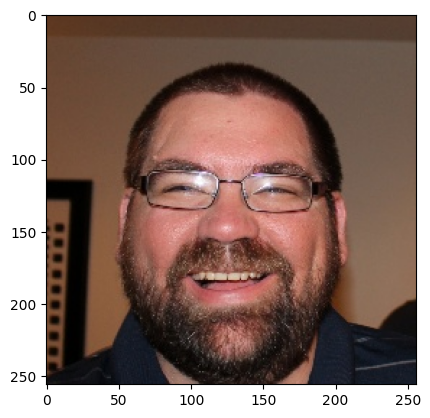

In [26]:
import PIL
from PIL import Image
im1 = Image.open('/content/real_vs_fake/real-vs-fake/test/real/00023.jpg')
p1 = np.array(im1)
plt.imshow(p1)
p1 = np.expand_dims(p1, axis=0)
p1.shape

1/1 [==============================] - 2s 2s/step
The Prediction of the sample is: It Is ALL
Prediction Confidence Percentage is:  nan


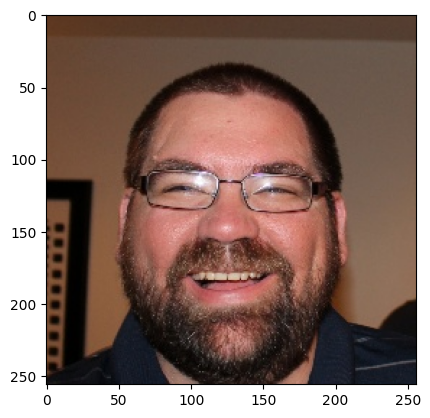

In [27]:
preds = model.predict(p1)
prediction = np.argmax(preds)
pct = np.max(preds)
if prediction == 0:
    print('The Prediction of the sample is: It Is ALL')
else:
    print('Prediction is Hem')
print("Prediction Confidence Percentage is: ", pct*100)
plt.imshow(im1);

In [28]:
print(preds)
print(prediction)

[[nan]]
0


In [30]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=88c69701e543d784b466c23e91ec84d99a90eab175110811eb70f33f7ce55a45
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


90


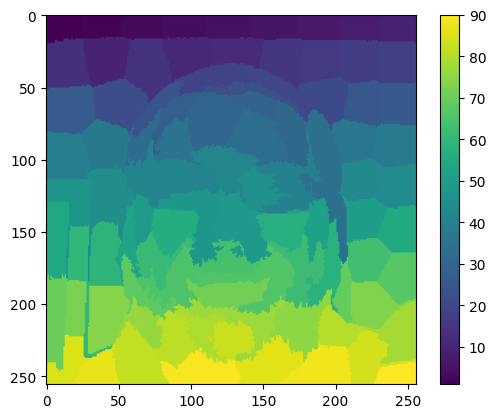

In [33]:
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries

segmentation_fn = SegmentationAlgorithm(
    'slic',
    kernel_size=4,
    max_dist=200,
    ratio=0.2,
    random_seed=42
)

segments = segmentation_fn(im1)


print(len(np.unique(segments)))

plt.imshow(segments)
plt.colorbar();

In [37]:
np.all(np.isfinite(im1))

True

In [38]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(im1), model.predict,
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


ValueError: ignored

In [35]:
from skimage.segmentation import mark_boundaries


temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=40, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=40, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2));

NameError: ignored

In [ ]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [ ]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming you already have 'y_test' and 'y_pred' defined

# Calculate ROC AUC Score
roc_auc = metrics.roc_auc_score(y_test, y_pred)

# Calculate AP Score
ap_score = metrics.average_precision_score(y_test, y_pred)

# Create ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Create Precision-Recall Curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'AP Score = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Display Classification Report
report = metrics.classification_report(y_test, y_pred > 0.5)
print("Classification Report:\n", report)
